In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_logs/trade_log_1110_1138.csv")
df.head()




,step,action,price,cash,stock,reward,asset_value,episode,ticker,timeframe
0,10,2,8037.538,100.01,0.0,0.0,0.0,1,BTC-USD,1d
1,11,2,8192.494,100.01,0.0,0.0,0.0,1,BTC-USD,1d
2,12,2,8144.194,100.01,0.0,0.0,0.0,1,BTC-USD,1d
3,13,2,8827.765,100.01,0.0,0.0,0.0,1,BTC-USD,1d
4,14,1,8807.011,75.005,0.003,-0.00103,25.002,1,BTC-USD,1d


In [23]:
# Display the column types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50749 entries, 0 to 50748
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   step         50749 non-null  object
 1   action       50749 non-null  object
 2   price        50749 non-null  object
 3   cash         50749 non-null  object
 4   stock        50749 non-null  object
 5   reward       50749 non-null  object
 6   asset_value  50749 non-null  object
 7   episode      50749 non-null  object
 8   ticker       50749 non-null  object
 9   timeframe    50749 non-null  object
dtypes: object(10)
memory usage: 3.9+ MB


In [24]:
col_convert = ['step', 'action', 'price', 'cash', 'stock',
                       'reward', 'asset_value', 'episode']

df[col_convert] = df[col_convert].apply(pd.to_numeric, errors='coerce')
df['reward'].round(6)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50749 entries, 0 to 50748
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         50725 non-null  float64
 1   action       50725 non-null  float64
 2   price        50725 non-null  float64
 3   cash         50725 non-null  float64
 4   stock        50725 non-null  float64
 5   reward       50725 non-null  float64
 6   asset_value  50725 non-null  float64
 7   episode      50725 non-null  float64
 8   ticker       50749 non-null  object 
 9   timeframe    50749 non-null  object 
dtypes: float64(8), object(2)
memory usage: 3.9+ MB


In [25]:
# overall positive and negative rewards

positive_total = df[df['reward'] > 0]['reward'].sum()
negative_total = df[df['reward'] < 0]['reward'].sum()

print("Total Positive Reward:", positive_total)
print("Total Negative Reward:", negative_total)

# rewards group based on actions

grouped_rewards = df.groupby('action')['reward'].sum()
print("\nRewards grouped by actions:")
print(grouped_rewards.to_string())

# Positive rewards grouped by action
positive_by_action = df[df['reward'] > 0].groupby('action')['reward'].sum()
print("\nPositive rewards by action:")
print(positive_by_action.to_string())

# Negative rewards grouped by action
negative_by_action = df[df['reward'] < 0].groupby('action')['reward'].sum()
print("\nNegative rewards by action:")
print(negative_by_action.to_string())




Total Positive Reward: 247.87419000000003
Total Negative Reward: -206.46703999999997

Rewards grouped by actions:
action
0.0    -0.11563
1.0    -1.03066
2.0    42.55344

Positive rewards by action:
action
0.0     12.76122
1.0      5.20917
2.0    229.90380

Negative rewards by action:
action
0.0    -12.87685
1.0     -6.23983
2.0   -187.35036


In [26]:
reward_sums = df.groupby(['episode', 'action'])['reward'].sum().unstack(fill_value=0)

# Add total reward per episode
reward_sums['total'] = reward_sums.sum(axis=1)

print("Sum of rewards per action per episode:")
print(reward_sums)


Sum of rewards per action per episode:
action       0.0      1.0      2.0    total
episode                                    
1.0     -0.15886 -0.15493  2.62170  2.30791
2.0      0.49449  0.08934  1.14171  1.72554
3.0      0.07767 -0.65612  1.43796  0.85951
4.0     -0.04719 -0.06552  3.23002  3.11731
5.0     -0.04674  0.03027  1.29955  1.28308
6.0     -0.06048 -0.12883  2.27846  2.08915
7.0     -0.08472  0.05881  1.97298  1.94707
8.0      0.00383 -0.05788  1.96052  1.90647
9.0     -0.04438 -0.00140  2.37743  2.33165
10.0    -0.19584  0.02800  0.35989  0.19205
11.0    -0.06878  0.08767  2.08647  2.10536
12.0    -0.07129 -0.02479  1.62206  1.52598
13.0    -0.00419 -0.02420  1.61282  1.58443
14.0    -0.00773  0.02647 -0.14465 -0.12591
15.0     0.06751 -0.04983  1.36787  1.38555
16.0     0.02354 -0.05008  2.09846  2.07192
17.0    -0.04971 -0.04681  1.69082  1.59430
18.0     0.20322 -0.01439  2.13439  2.32322
19.0     0.06252  0.09113  2.21649  2.37014
20.0    -0.01751 -0.01371  2.05112  2

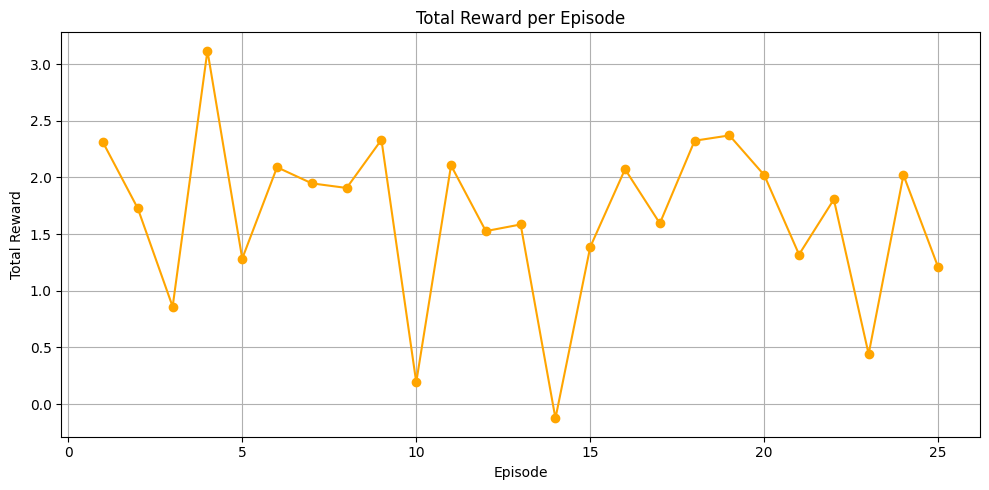

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(reward_sums.index, reward_sums['total'], marker='o', color='orange')
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
# Group data by action and calculate reward statistics
reward_stats = df.groupby('action')['reward'].describe()

# Rename the actions for clarity
reward_stats.rename(index={0: 'Hold', 1: 'Buy', 2: 'Sell'}, inplace=True)

# Display the results
print("Reward Statistics by Action:")
print(reward_stats)

# Calculate the mean reward for each episode
episode_mean_reward = df.groupby('episode')['reward'].mean()

Reward Statistics by Action:
          count      mean       std      min       25%       50%       75%  \
action                                                                       
Hold     3146.0 -0.000037  0.014088 -0.12237 -0.004420 -0.000845  0.003688   
Buy      1195.0 -0.000862  0.016102 -0.11325 -0.005305 -0.000880  0.004550   
Sell    46384.0  0.000917  0.017571 -0.17194 -0.003440  0.000000  0.004210   

            max  
action           
Hold    0.12667  
Buy     0.13884  
Sell    0.25572  


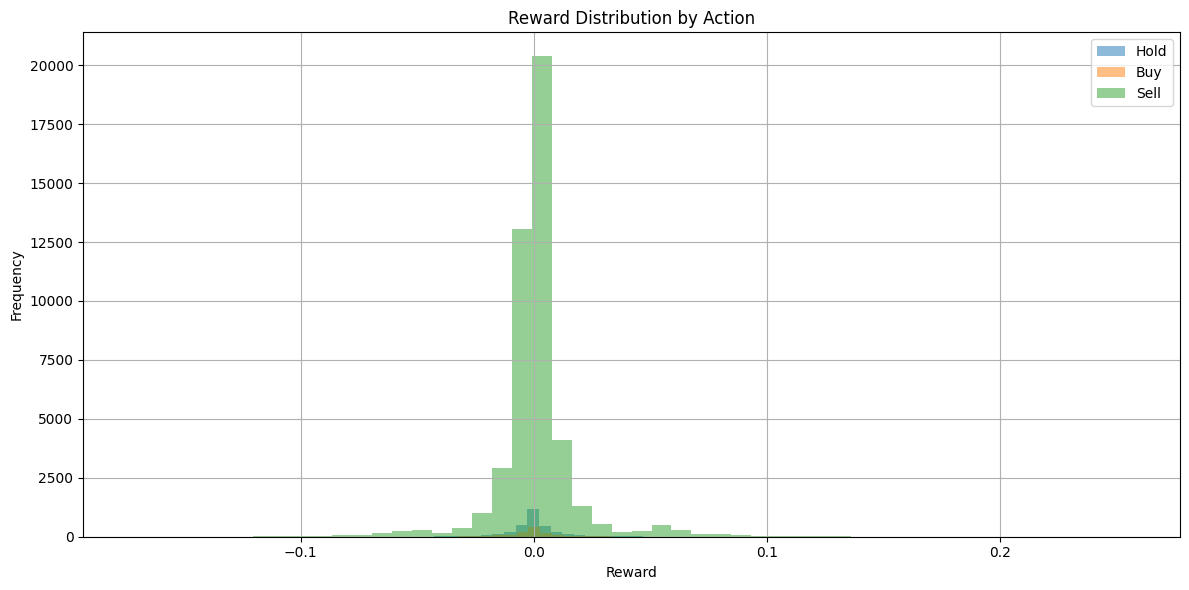

In [29]:
plt.figure(figsize=(12, 6))
df[df['action'] == 0]['reward'].plot(kind='hist', bins=50, alpha=0.5, label='Hold')
df[df['action'] == 1]['reward'].plot(kind='hist', bins=50, alpha=0.5, label='Buy')
df[df['action'] == 2]['reward'].plot(kind='hist', bins=50, alpha=0.5, label='Sell')
plt.title('Reward Distribution by Action')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# measure actions and amount of stocks buy/sell/hold

action_counts = df['action'].value_counts()

total_bought = df[df['action'] == 1]['stock'].sum()

df['prev_stock'] = df.groupby('step')['stock'].shift(1)
df['stock_delta'] = df['prev_stock'] - df['stock']

# --- BUY VALUE ---
# For Buy, assume the full stock was just bought at current price
buy_df = df[df['action'] == 1]
total_buy_value = (buy_df['stock'] * buy_df['price']).sum()

# --- SELL VALUE ---
# For Sell, stock sold = prev_stock - current stock
sell_df = df[df['action'] == 2].copy()
sell_df['stock_sold'] = sell_df['prev_stock'] - sell_df['stock']
sell_df['sell_value'] = sell_df['stock_sold'] * sell_df['price']
total_sell_value = sell_df['sell_value'].sum()

total_sold = df.loc[df['action'] == 2, 'stock_delta'].sum()
total_hold = df[df['action'] == 0]['stock'].sum()

total_bought = round(total_bought, 4)
total_sold = round(total_sold, 4)
total_hold = round(total_hold, 4)

# Round results
total_buy_value = round(total_buy_value, 4)
total_sell_value = round(total_sell_value, 4)

# Print results
print("Action Counts:")
print(action_counts.to_string())
print(f"\nTotal Buy Value: ${total_buy_value}")
print(f"Total Sell Value: ${total_sell_value}")
print(f"\nTotal stocks bought: {total_bought}")
print(f"Total stocks sold: {total_sold}")
print(f"Total stock  hold: {total_hold}")

Action Counts:
action
2.0    46384
0.0     3146
1.0     1195

Total Buy Value: $94911.6122
Total Sell Value: $72897.7088

Total stocks bought: 2.786
Total stocks sold: 2.178
Total stock  hold: 4.096


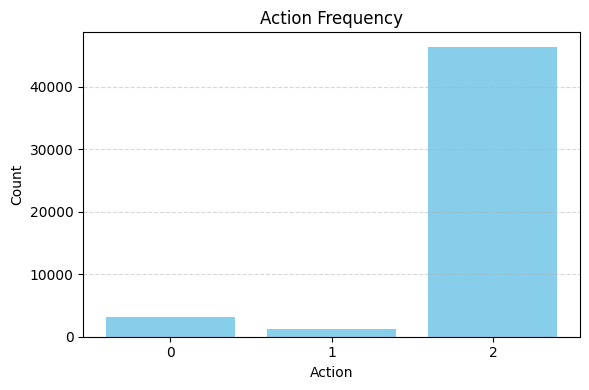

In [31]:

plt.figure(figsize=(6,4))
plt.bar(action_counts.index, action_counts.values, color='skyblue')
plt.xlabel('Action')
plt.ylabel('Count')
plt.title('Action Frequency')
plt.xticks([0,1, 2])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()